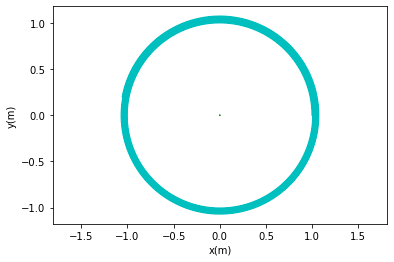

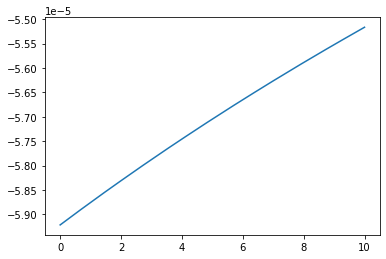

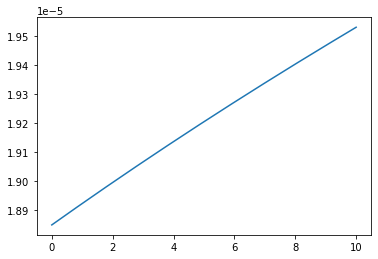

<Figure size 432x288 with 0 Axes>

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np 



#Constants:

G = 4*np.pi**2 #4np.pi

#Time is measured in years
#Distance is Measured in AU
#Mass is measured in MSun

#G = 240.25824 # Gravitational Constant mm^3/(kg min^2)
#AU = 1000 # Distance between Star 1 & Star 2 
#sec = 24.0*60*60 #seconds in a day 


#grav = G*M1*M2

def gravity_simulate(particles,time,steps):

    #Initial Conditions: 
    t = 0.0
    dt = float(time)/steps 
    e = 0
    
    Energy = []
    Time   = []
    Lz     = []
    
    

    def force(rx, ry, rz):
        return -1/(rx**2+ry**2+rz**2)
    
    while t < time: 
        t += dt
        e = 0
        lz = 0
        
        for i, Particle1 in enumerate(particles):
            fx = 0
            fy = 0
            fz = 0
            
            e += (1./2)*Particle1["Mass"]*Particle1["Velocity"][0]**2
            e += (1./2)*Particle1["Mass"]*Particle1["Velocity"][1]**2
            e += (1./2)*Particle1["Mass"]*Particle1["Velocity"][2]**2
            
            lz += Particle1["Mass"]*(Particle1["Position"][0]*Particle1["Velocity"][1] - Particle1["Position"][1]*Particle1["Velocity"][0])
            
            for j, Particle2 in enumerate(particles):
                if i == j: continue
                g = G*Particle1["Mass"]*Particle2["Mass"]
                
                rx = Particle2["Position"][0] - Particle1["Position"][0] 
                ry = Particle2["Position"][1] - Particle1["Position"][1]
                rz = Particle2["Position"][2] - Particle1["Position"][2] 
                
                r3 = pow(rx**2+ry**2+rz**2,1.5)
                
                fx += g*rx/r3
                fy += g*ry/r3
                fz += g*rz/r3
                
                e += -g/(2*np.sqrt(rx**2+ry**2+rz**2))
                
            if (np.sqrt(fx**2+fy**2+fz**2) > 10000):
                t = 90.0
                for Particle2 in particles:
                    print(Particle2["Position"])
                    
            #def RK4(func,h,t1,x1):
                #c1 = 1./6.
               # c2 = 1./3.
               # c3 = 1./3.
               # c4 = 1./6.
    
               # a1 = 0.5
               # a2 = 0.5
               # a3 = 1.0
    
              #  k1 = func(t1,x1)
              #  k2 = func(t1+a1*h,x1+a1*h*k1)
              #  k3 = func(t1+a2*h,x1+a2*h*k2)
               # k4 = func(t1+a3*h,x1+a3*h*k3)
    
              #  t2 = t1 + h
              #  x2 = x1 + h*(c1*k1 + c2*k2 + c3*k3 + c4*k4)
    
               # return k1,t2,x2        
             
            
            Particle1["Position"][0] += Particle1["Velocity"][0]*dt
            Particle1["Position"][1] += Particle1["Velocity"][1]*dt
            Particle1["Position"][2] += Particle1["Velocity"][2]*dt
            
            Particle1["Velocity"][0] += fx*dt/Particle1["Mass"]
            Particle1["Velocity"][1] += fy*dt/Particle1["Mass"]
            Particle1["Velocity"][2] += fz*dt/Particle1["Mass"]

            Particle1["Trajectory"][0].append(Particle1["Position"][0])
            Particle1["Trajectory"][1].append(Particle1["Position"][1])
            Particle1["Trajectory"][2].append(Particle1["Position"][2])
            
        Energy.append(e)
        Time.append(t)
        Lz.append(lz)
        
    return Time, Energy, Lz

particles = []
particle1 = {"Name":"Star1","Mass":1,"Position":[0.0, 0.0, 0.0],"Velocity":[0.0, 0.0, 0.0],"Trajectory":[[],[],[]]}
particle2 = {"Name":"Star2","Mass":3e-6,"Position":[1.0, 0.0, 0.0],"Velocity":[0.0, 2*np.pi, 0.0],"Trajectory":[[],[],[]]}
#particle3 = {"Name":"Planet1","Mass":1e-4,"Position":[-90.0, 0.0, 0.0],"Velocity":[0.0, 1.5, 0.0],"Trajectory":[[],[],[]]}

particles = [particle1,particle2] #particle3

Time, Energy, Lz = gravity_simulate(particles, 10, 100000)
        
#Plot the results 
plt.plot(particles[0]["Trajectory"][0], particles[0]["Trajectory"][1], "-g")
plt.plot(particles[1]["Trajectory"][0], particles[1]["Trajectory"][1], "-c")
#plt.plot(particles[2]["Trajectory"][0], particles[2]["Trajectory"][1], "-k")

plt.axis("equal")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

plt.clf()
plt.plot(Time,Energy)
plt.show()
plt.clf()
plt.plot(Time,Lz)
plt.show()
plt.savefig("Trajectory.png")


#With the net forces, find the new momentum of each object at the end of the time interval.

#Using the momentum, find the new position of the object at the end of the time interval.

#Update the time and repeat the process until you are happy.